In [2]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import numpy as np

data = pd.read_excel('features1.xlsx')

In [5]:
def min_max_normalization(df):
    return (df - df.min()) / (df.max() - df.min())
def grey_relation_coefficient(reference_series, compare_series, rho=0.5):
    # 计算绝对差
    diff = np.abs(reference_series - compare_series)
    # 最小差和最大差
    min_diff = np.min(diff)
    max_diff = np.max(diff)
    # 计算关联系数
    relation_coefficient = (min_diff + rho * max_diff) / (diff + rho * max_diff)
    return relation_coefficient

def grey_relation_degree(reference_series, compare_series):
    relation_coefficients = grey_relation_coefficient(reference_series, compare_series)
    return np.mean(relation_coefficients)

def grey_relation_analysis(data, target_column, rho=0.5):
    compare_series_list = data.drop(columns=[target_column])
    
    # 无量纲化处理
    normalized_data = min_max_normalization(data)
    
    # 计算灰色关联度
    grey_degrees = {}
    for column in compare_series_list.columns:
        compare_series = normalized_data[column]
        grey_degrees[column] = grey_relation_degree(normalized_data[target_column], compare_series)
    
    # 将结果转换为DataFrame并排序
    grey_degrees_df = pd.DataFrame.from_dict(grey_degrees, orient='index', columns=['Grey Relation Degree'])
    grey_degrees_df = grey_degrees_df.sort_values(by='Grey Relation Degree', ascending=False)
    
    return grey_degrees_df
# 假设数据df已经加载
grey_relation_results = grey_relation_analysis(data, target_column='y3')
print(grey_relation_results)

     Grey Relation Degree
x44              0.804520
x86              0.797263
x89              0.795451
x95              0.790406
x4               0.789132
..                    ...
x83              0.622898
x5               0.601956
x2               0.596828
x46              0.595557
x72              0.520556

[102 rows x 1 columns]


可视化

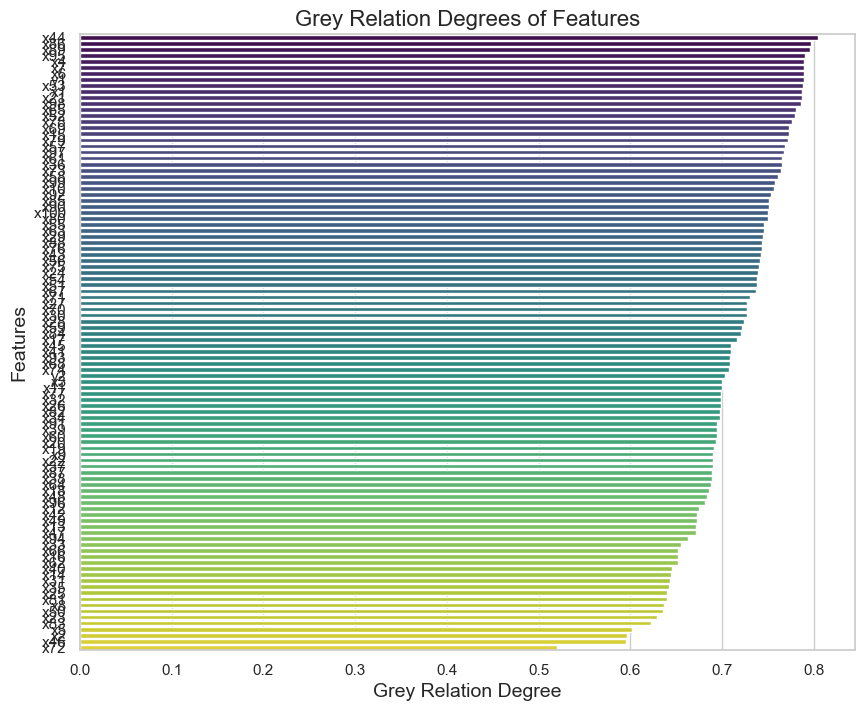

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# 设置绘图风格
sns.set(style="whitegrid")

# 创建绘图区域
plt.figure(figsize=(10, 8))

# 绘制条形图
sns.barplot(x='Grey Relation Degree', y=grey_relation_results.index, data=grey_relation_results, palette="viridis")

# 设置标题和标签
plt.title('Grey Relation Degrees of Features', fontsize=16)
plt.xlabel('Grey Relation Degree', fontsize=14)
plt.ylabel('Features', fontsize=14)

# 显示图形
plt.show()


In [9]:
# 计算灰色关联度
grey_relation_results = grey_relation_analysis(data, target_column='y3')
print(grey_relation_results)

   Feature  Grey Relation Degree
96     x95              0.820135
66     x65              0.819631
90     x89              0.818003
45     x44              0.809174
5       x4              0.806116
..     ...                   ...
51     x50              0.642383
6       x5              0.641783
3       x2              0.604911
47     x46              0.602942
73     x72              0.528266

[102 rows x 2 columns]


In [6]:
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-592.909343,-0.322781,0.009430,0.161257,0.00006,0.308464,-592.863552,81.482715,-592.873554,-592.862607,...,106.042361,40.161713,522.063744,1577.892568,1906.114062,15191.247467,1869.776298,21709.201881,11829.397482,383.004014
1,-600.575957,-0.322562,0.009426,0.161280,0.00006,0.308131,-600.530612,81.528240,-600.540447,-600.529668,...,106.039373,40.162084,522.131540,1577.932221,1906.101274,15190.034067,1869.755451,21708.203682,11829.440309,382.843062
2,-591.029375,-0.322344,0.009422,0.161302,0.00006,0.307791,-590.983914,81.574065,-590.993742,-590.982970,...,106.036384,40.162455,522.199353,1577.971886,1906.088484,15188.820511,1869.734602,21707.205257,11829.483144,382.681980
3,-563.555571,-0.322125,0.009418,0.161326,0.00006,0.307445,-563.509407,81.620212,-563.519394,-563.508463,...,106.033394,40.162826,522.267181,1578.011566,1906.075691,15187.606850,1869.713751,21706.206616,11829.525988,382.520784
4,-631.413630,-0.321906,0.009415,0.161349,0.00006,0.307105,-631.369903,81.666434,-631.379098,-631.368959,...,106.030404,40.163197,522.335052,1578.051249,1906.062899,15186.392511,1869.692898,21705.207631,11829.568833,382.359297


In [3]:
import pandas as pd
import numpy as np

def min_max_normalization(df):
    """
    对数据进行无量纲化处理，消除量纲的影响
    """
    return (df - df.min()) / (df.max() - df.min())

def grey_relation_analysis(data, target_column, rho=0.5):
    """
    进行灰色关联分析
    """
    # 无量纲化处理
    normalized_data = min_max_normalization(data)
    
    # 提取母序列（目标列）
    reference_series = normalized_data[target_column]
    
    # 计算绝对差矩阵
    abs_diff_matrix = np.abs(normalized_data.drop(columns=[target_column]).values - reference_series.values[:, np.newaxis])
    
    # 计算全局最小值和最大值
    min_diff = np.min(abs_diff_matrix)
    max_diff = np.max(abs_diff_matrix)
    
    # 计算关联系数矩阵
    relation_coefficient_matrix = (min_diff + rho * max_diff) / (abs_diff_matrix + rho * max_diff)
    
    # 计算每列的平均关联系数
    grey_degrees = np.mean(relation_coefficient_matrix, axis=0)
    
    # 将结果转换为DataFrame并排序
    feature_names = normalized_data.drop(columns=[target_column]).columns
    grey_degrees_df = pd.DataFrame({
        'Feature': feature_names,
        'Grey Relation Degree': grey_degrees
    })
    
    # 按灰色关联度排序并返回结果
    grey_degrees_df = grey_degrees_df.sort_values(by='Grey Relation Degree', ascending=False).reset_index(drop=True)
    
    return grey_degrees_df

# 假设数据df已经加载
grey_relation_results = grey_relation_analysis(data, target_column='y3')
print(grey_relation_results)

    Feature  Grey Relation Degree
0       x95              0.820135
1       x65              0.819631
2       x89              0.818003
3       x44              0.809174
4        x4              0.806116
..      ...                   ...
97      x50              0.642383
98       x5              0.641783
99       x2              0.604911
100     x46              0.602942
101     x72              0.528266

[102 rows x 2 columns]


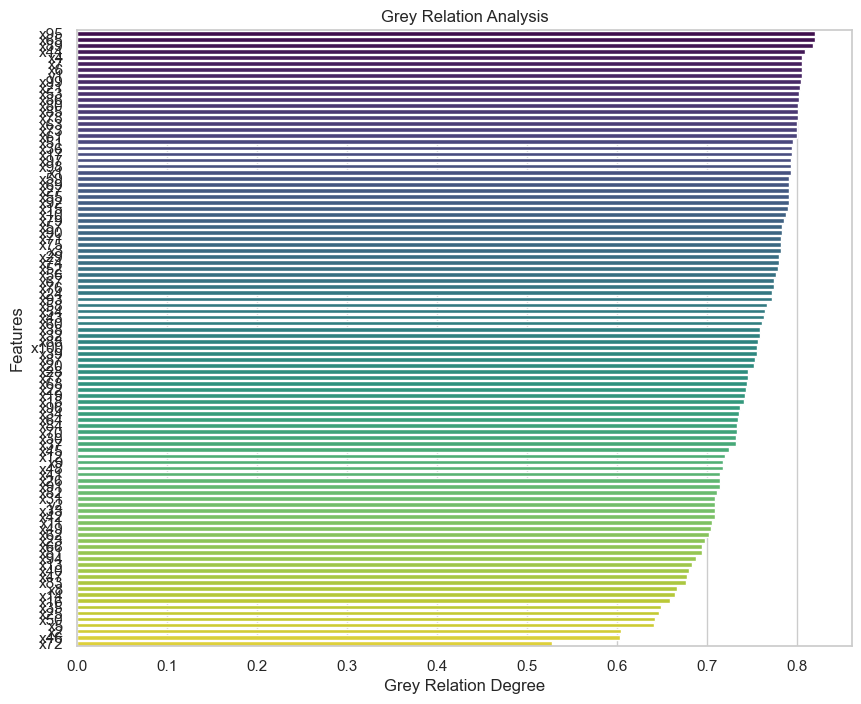

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grey_relation_sns(grey_relation_df):
    """
    使用Seaborn可视化灰色关联分析结果
    """
    # 排序后的特征名和关联度
    grey_relation_df = grey_relation_df.sort_values('Grey Relation Degree', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Grey Relation Degree', y='Feature', data=grey_relation_df, palette="viridis")
    
    plt.xlabel('Grey Relation Degree')
    plt.ylabel('Features')
    plt.title('Grey Relation Analysis')
    plt.show()

# 调用可视化函数
plot_grey_relation_sns(grey_relation_results)


In [10]:
# 选择前50个特征
top_50_grey_relation = grey_relation_results.head(50)

# 将结果保存到Excel文件
top_50_grey_relation.to_excel('top_50_grey_relation.xlsx', index=False)

print("前50个灰色关联度结果已保存到 'top_50_grey_relation.xlsx'")

前50个灰色关联度结果已保存到 'top_50_grey_relation.xlsx'
